In [2]:
import numpy as np

import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

In [3]:
X = load_data()

In [19]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


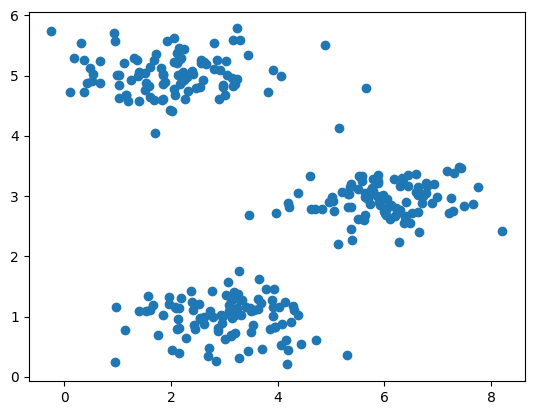

In [20]:
plt.scatter(X[:,0], X[:,1])

#### Finding Closest Centroids


In [21]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
          # Array to hold distance between X[i] and each centroids[j]
          distance = [] 
          for j in range(centroids.shape[0]):
              norm_ij = np.linalg.norm(X[i] - centroids[j])
              distance.append(norm_ij)
          idx[i] = np.argmin(distance)
    
    return idx

In [22]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First five elements in idx are:", idx[:5])

# Print the first five elements of X
print("First five elements of X are:\n", X[:5]) 



First five elements in idx are: [0 2 1 0 0]
First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]


#### Computing Centroid Means


In [23]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    m, n = X.shape                    # m=300 points, n=2 features (x,y coordinates)
    centroids = np.zeros((K, n))      # Create empty array for K centroids, each with n dimensions
    
    for k in range(K):                # For clusters 0, 1, 2, ...
        points = X[idx == k]          # Find all points assigned to cluster k
        centroids[k] = np.mean(points, axis=0)  # Compute mean position
    
    return centroids

In [27]:
K = len(initial_centroids)
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


#### K-Means Algorithm


In [28]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


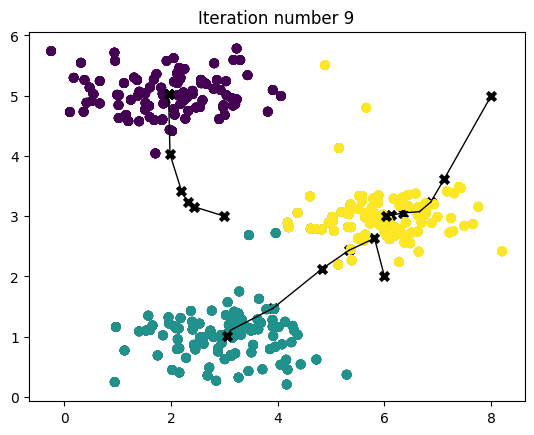

In [29]:
# Number of iterations
max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)